In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from googletrans import Translator
from camel_tools.sentiment import SentimentAnalyzer
from camel_tools.utils.normalize import normalize_unicode
from transformers import pipeline
import json

from camel_tools.sentiment import SentimentAnalyzer
from camel_tools.utils.normalize import normalize_unicode
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.dediac import dediac_ar
from camel_tools.tokenizers.word import simple_word_tokenize
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
from ar_wordcloud import ArabicWordCloud
from ar_wordcloud.utils import read_mask_image
import arabic_reshaper
from bidi.algorithm import get_display

In [3]:
single = pd.read_csv('single_overall_counts_column.csv')

In [4]:
single.head()

,word,overall_counts
0,محمد,379426
1,المتحده,353889
2,الرئيس,346037
3,الولايات,238214
4,الامريكيه,226292


In [9]:
single.sort_values(by='overall_counts', ascending=False)

,word,overall_counts
0,محمد,379426
1,المتحده,353889
2,الرئيس,346037
3,الولايات,238214
4,الامريكيه,226292
...,...,...
1561721,اهميهمشيرا,1
1561720,التقنيهامكانات,1
1561719,الجامعهقائلا,1
1561718,بسهولهمشيدا,1


In [10]:
single = single.head(100)

In [12]:
ASW1 = [get_display(arabic_reshaper.reshape(x)) for x in single.word]

In [13]:
ASW1

['ﺪﻤﺤﻣ',
 'ﻩﺪﺤﺘﻤﻟﺍ',
 'ﺲﻴﺋﺮﻟﺍ',
 'ﺕﺎﻳﻻﻮﻟﺍ',
 'ﻪﻴﻜﻳﺮﻣﻻﺍ',
 'ﻡﺎﻌﻟﺍ',
 'ﻲﺘﺣ',
 'ﺮﺼﻣ',
 'ﻕﺍﺮﻌﻟﺍ',
 'ﻢﻟﺎﻌﻟﺍ',
 'ﷲ',
 'ﻞﻴﺋﺍﺮﺳﺍ',
 'ﻮﻫﻭ',
 'ﻪﻴﺑﺮﻌﻟﺍ',
 'ﺲﻠﺠﻣ',
 'ﻥﺍﻭ',
 'ﻻﻭ',
 'ﷲﺪﺒﻋ',
 'ﻪﻴﻛﺮﻴﻣﻻﺍ',
 'ﺪﻤﺣﺍ',
 'ﻪﻣﻮﻜﺤﻟﺍ',
 'ﺎﻣﺎﺑﻭﺍ',
 'ﻦﻄﻨﺷﺍﻭ',
 'ﻪﻴﺟﺭﺎﺨﻟﺍ',
 'ﻲﻜﻳﺮﻣﻻﺍ',
 'ﻝﻭﺪﻟﺍ',
 'ﻦﻣﻻﺍ',
 'ﺪﺿ',
 'ﻱﺮﺧﺍ',
 'ﻦﻣﻭ',
 'ﺵﻮﺑ',
 'ﻩﺪﻋﺎﻘﻟﺍ',
 'ﻲﻛﺮﻴﻣﻻﺍ',
 'ﻞﺜﻣ',
 'ﻥﺍﺮﻳﺍ',
 'ﻚﻠﺗ',
 'ﻪﻘﻄﻨﻤﻟﺍ',
 'ﺐﻌﺸﻟﺍ',
 'ﻲﻫﻭ',
 'ﻦﻜﻟﻭ',
 'ﺪﻗﻭ',
 'ﻪﻟﻭﺪﻟﺍ',
 'ﺲﻴﻟ',
 'ﻩﺭﺍﺯﻭ',
 'ﻪﻴﻟﻭﺪﻟﺍ',
 'ﺎﻜﻳﺮﻣﺍ',
 'ﺎﻤﻴﻓ',
 'ﻞﺑ',
 'ﻲﺑﺮﻌﻟﺍ',
 'ﺏﺮﺤﻟﺍ',
 'ﺮﻣﻻﺍ',
 'ﻲﻟﻭﺪﻟﺍ',
 'ﻲﺘﻟﺍﻭ',
 'ﻲﻟﻭﻻﺍ',
 'ﻥﻻ',
 'ﺕﺍﻮﻘﻟﺍ',
 'ﻪﻴﺳﺎﻴﺴﻟﺍ',
 'ﻝﺍ',
 'ﺮﺧﺍ',
 'ﻥﻮﻜﺗ',
 'ﻲﻠﻴﺋﺍﺮﺳﻻﺍ',
 'ﻪﺻﺎﺧ',
 'ﺕﺎﺑﺎﺨﺘﻧﻻﺍ',
 'ﻱﺮﺼﻤﻟﺍ',
 'ﻙﺭﺎﺒﻣ',
 'ﻝﻭﺩ',
 'ﻪﻔﻴﺤﺼﻟﺍ',
 'ﻡﻮﻳ',
 'ﻪﻟﻭﺩ',
 'ﻂﻘﻓ',
 'ﻚﻟﺫﻭ',
 'ﺭﻮﺘﻛﺪﻟﺍ',
 'ﻥﺎﻛﻭ',
 'ﻩﺪﻳﺪﺟ',
 'ﻥﺎﻨﺒﻟ',
 'ﻪﻴﻠﻤﻋ',
 'ﻲﻨﻃﻮﻟﺍ',
 'ﻩﺭﺍﺩﺍ',
 'ﺎﻤﺑ',
 'ﻪﻴﻨﻴﻄﺴﻠﻔﻟﺍ',
 'ﻡﺎﻈﻨﻟﺍ',
 'ﺎﻤﻣ',
 'ﻡﻼﺴﻟﺍ',
 'ﺩﺎﺤﺗﻻﺍ',
 'ﻕﺮﺸﻟﺍ',
 'ﻪﻣﺎﻌﻟﺍ',
 'ﻢﺘﻳ',
 'ﻢﻟﻭ',
 'ﻪﻘﻄﻨﻣ',
 'ﻪﻴﻠﻴﺋﺍﺮﺳﻻﺍ',
 'ﻱﺪﻟ',
 'ﺖﺤﺗ',
 'ﺪﻘﻓ',
 'ﺢﻟﺎﺻ',
 'ﻞﺧﺍﺩ',
 'ﻉﺎﻓﺪﻟﺍ',
 'ﺏﺰﺣ',
 'ﺩﻮﺟﻭ',
 'ﺍﺮﻴﺸﻣ',
 'ﻩﺮﻴﺧﻻﺍ']

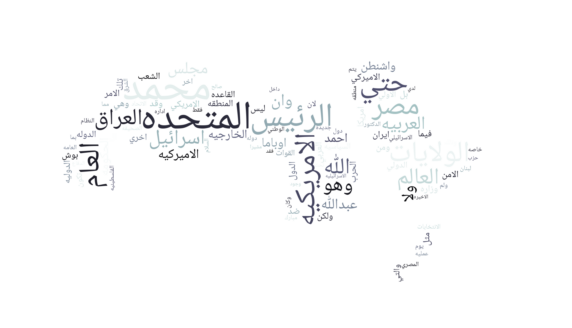

In [14]:
plt.figure(figsize=[10,12])
mask = np.array(Image.open("./map_trial.png"))
image = ArabicWordCloud(width = 3000, height = 2000, background_color='white', colormap='bone', contour_width=0,collocations=False, mask=mask).generate(' '.join(ASW1))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.imshow(image, interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("image_map.png", format="png", bbox_inches='tight') 
plt.show()

In [15]:
bigrams = pd.read_csv('all_bigrams.csv')

In [16]:
bigrams.head()

,bigram,alittihad,sabanews,echoroukonline,alqabas,almasryalyoum,techreen,ryiadh,almustaqbal,saudiyoum,youm7,overall
0,"('الولايات', 'المتحده')",21937,2756,5112,18347,14258,26738,21934,31794,39069,41896,223851
1,"('الشرق', 'الاوسط')",4651,399,1161,4603,4992,5139,6269,9311,9156,14601,60292
2,"('الامم', 'المتحده')",4930,698,1324,3565,2846,7655,4525,8339,9615,8726,52233
3,"('باراك', 'اوباما')",6294,1030,1461,2304,3076,3593,3678,5414,4519,18690,50069
4,"('في', 'العراق')",0,0,0,0,0,0,8505,17149,16514,6699,48877


In [20]:
bigrams = bigrams.sort_values(by='overall', ascending=False).head(100)

In [21]:
ASW2 = [get_display(arabic_reshaper.reshape(x)) for x in bigrams.bigram]

In [33]:
bigrams['bigram'] = bigrams['bigram'].astype(str)

In [36]:
bigrams = bigrams.head(10)

In [37]:
ASW2 = [get_display(arabic_reshaper.reshape(x)) for x in bigrams.bigram]

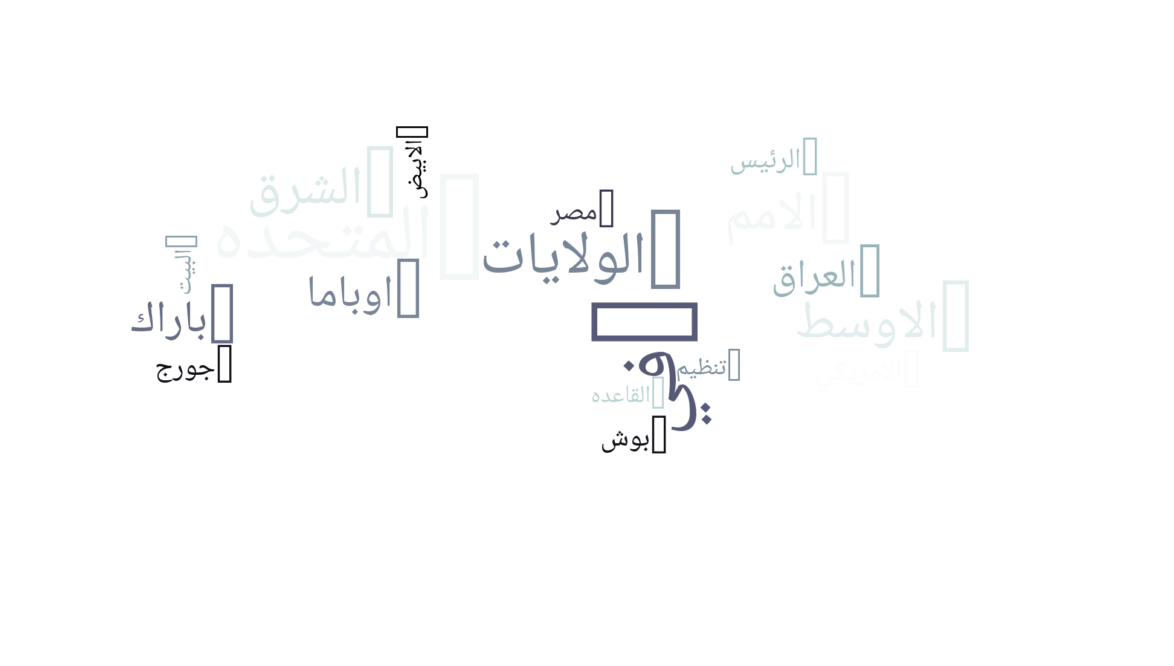

In [38]:
plt.figure(figsize=[30,12])
mask = np.array(Image.open("./map_trial.png"))
image = ArabicWordCloud(width = 3000, height = 2000, background_color='white', colormap='bone', contour_width=0,collocations=False, mask=mask).generate(' '.join(ASW2))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.imshow(image, interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("image_map.png", format="png", bbox_inches='tight') 
plt.show()